## Linear Regression and RANSAC

This example is adapted from: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html

In [1]:
# Load the modules we need
import numpy as np
import math
import random
from numpy.linalg import inv
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

In [2]:
#  Create some intial data
n_samples = 1000

X, y = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      random_state=0)

In [3]:
# Add some outlier data
np.random.seed(0)
n_outliers = 50
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

In [4]:
# Create some test positions for for the lines we will draw
line_X = np.arange(X.min(), X.max())[:, np.newaxis]

In [5]:
# This is the cell you need to replace to complete Task 2.
# Fit line using all data.
def fit_line(xValues, yValues):

    fx = xValues.flatten()
    t = tuple(zip(fx, y))
    
    #Sum up of the multiple of all x and y values
    sumXY = np.sum([t[x][0] * t[x][1] for x in range(len(t))])
    #Sum of the square of all x values
    sumXsqr = np.sum([x**2 for x in fx])
    #Sum of x values
    sumX = np.sum(fx)
    #Sum of y values
    sumY = np.sum(y)
    #total number of values
    sumN = len(X)
    
    """Create matrix 
    [sumXsqr, sumX] 
    [sumX   , sumN]
    """
    
    mat = ([[sumXsqr, sumX], [sumX, sumN]])
    matinv = inv(mat)
    vector = ([[sumXY],[sumY]])

    #Value = matrix multiplication of the matrix and the vector created above, flatten to get it in a 1d array
    val = np.matmul(matinv, vector).flatten()

    line_y = []
    lineFx = line_X.flatten()
    #For all values in x apply the linear equation to get y value
    for x in lineFx:
        t = val[0]*x + val[1]

        line_y.append(t)
    return line_y


#get values from matrix multiplication and return it
def get_values(xValues, yValues):
    fx = xValues.flatten()
    t = tuple(zip(fx, y))

    sumXY = np.sum([t[x][0] * t[x][1] for x in range(len(t))])
    sumXsqr = np.sum([x**2 for x in fx])
    sumX = np.sum(fx)
    sumY = np.sum(y)
    sumN = len(X)

    mat = ([[sumXsqr, sumX], [sumX, sumN]])
    matinv = inv(mat)
    vector = ([[sumXY],[sumY]])


    val = np.matmul(matinv, vector).flatten()
    return val
    

In [13]:
#Initialise values error margin, minimum number of samples, loss function, residual threshold.
e = n_outliers /n_samples
s = 2
threshold = 35

#Calculate the N value
def get_N (e,s,p):
    return math.ceil((math.log(1-p)/math.log(1-(1-e)**s)))

def get_Line(iterations):   
    count = 0
    #Create values for the y line 
    line_y_ransac = []
    
    #Values that are inliers and outliers
    inlier_mask = np.array([])
    outlier_mask = np.array([])
    random.seed(45)
    #For a number of iterations
    for x in range(iterations):
        sd = random.randrange(len(X))
        xd = random.randrange(len(X))
        
        #Get values v
        v = get_values(np.array([X[sd],X[xd]]), np.array([y[sd],y[xd]]))
        #get current line
        curr = fit_line(np.array([X[sd],X[xd]]), np.array([y[sd],y[xd]]))
        
        #Work out the inliers based on a threshold from values v and the current line
        inliers = np.array([y[i] for i in range(len(X)) if y[i] < X[i]*v[0] + \
               v[1] + threshold and y[i] > X[i]*v[0] + v[1] - threshold])
        
        #if the count is less than number of inliears
        if count < len(inliers):
            inlier_mask = []
            outlier_mask = []
            #Count = number of inliers
            count = len(inliers)
            #Line_y_ransac = current calculated line
            line_y_ransac = curr
            
            #For every x value 
            for i in range(len(X)):
                #if y value is in acceptable threshold then it is an inlier. set Inlier index to true and outlier
                #index to fales
                if y[i] < X[i]*v[0] + v[1] + threshold and y[i] > X[i]*v[0] + v[1] - threshold:
                    inlier_mask.append(True)
                    outlier_mask.append(False)
                #Else do the opposite
                else:
                    inlier_mask.append(False)
                    outlier_mask.append(True)
    return line_y_ransac, inlier_mask, outlier_mask

#Get new error margin after update
def get_e(outlier_mask):
    eVar = 0
    for i in outlier_mask:
        if i == True:
            eVar += 1
    return eVar/len(outlier_mask)


line_y_ransac, inlier_mask, outlier_mask = get_Line(get_N(e,s,0.99))
e = get_e(outlier_mask)

#While error margin is not 0.05 create a new line
while e != 0.05:
    line_y_ransac, inlier_mask, outlier_mask = get_Line(get_N(e,s,0.99))
    e = get_e(outlier_mask)

print(line_y_ransac)
print(np.matrix(outlier_mask))

[-249.15674453172184, -168.41308916124407, -87.6694337907663, -6.925778420288555, 73.8178769501892, 154.56153232066694, 235.30518769114468, 316.04884306162245]
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False 

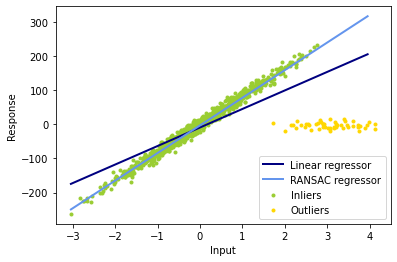

In [14]:
#Plotting graph so you can see the line created usiing the RANSAC above 
lw = 2

doing_linear = True
doing_ransac = True

if (doing_linear):
    plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')

if (doing_ransac):
    plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.', label='Inliers')
    plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.', label='Outliers')
    plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw, label='RANSAC regressor')
else:
    plt.scatter(X, y, color='yellowgreen', marker='.', label='Data')
    
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()